### Preparation

In [ ]:
!git clone https://github.com/zaniargh42/SnappFoodTask.git

Cloning into 'SnappFoodTask'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 4), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (17/17), 762.96 KiB | 1.99 MiB/s, done.


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/SnappFoodTask/Data analyst Task.csv')
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,NaN,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,NaN,15000
4,5,5,11/10/2021,10000,1.0,16000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29057 entries, 0 to 29056
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       29057 non-null  int64  
 1   user_id        29057 non-null  int64  
 2   created_at     29057 non-null  object 
 3   discount_cost  29057 non-null  int64  
 4   discount_type  6925 non-null   float64
 5   basket         29057 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.3+ MB


In [ ]:
df.shape

(29057, 6)

In [ ]:
df.isna().sum()

order_id             0
user_id              0
created_at           0
discount_cost        0
discount_type    22132
basket               0
dtype: int64

In [ ]:
df['discount_type'].unique()

array([ 1., nan,  2.])

In [ ]:
df['discount_type'] = df['discount_type'].fillna(0)
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,0.0,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,0.0,15000
4,5,5,11/10/2021,10000,1.0,16000


In [ ]:
df['discount_type'] = df['discount_type'].astype('int32')
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1,12000
1,2,2,5/9/2021,0,0,20000
2,3,3,5/9/2021,10000,1,14000
3,4,4,11/10/2021,0,0,15000
4,5,5,11/10/2021,10000,1,16000


In [ ]:
df.tail()

,order_id,user_id,created_at,discount_cost,discount_type,basket
29052,29053,6622,7/31/2022,0,0,18000
29053,29054,9985,7/31/2022,0,0,25000
29054,29055,8843,7/31/2022,6000,1,24000
29055,29056,8703,7/31/2022,0,0,40000
29056,29057,4424,7/31/2022,0,0,17000


In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'],format = "%m/%d/%Y")
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,2021-04-12,10000,1,12000
1,2,2,2021-05-09,0,0,20000
2,3,3,2021-05-09,10000,1,14000
3,4,4,2021-11-10,0,0,15000
4,5,5,2021-11-10,10000,1,16000


In [ ]:
df.dtypes

order_id                  int64
user_id                   int64
created_at       datetime64[ns]
discount_cost             int64
discount_type             int32
basket                    int64
dtype: object

In [ ]:
df.head(10)

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,2021-04-12,10000,1,12000
1,2,2,2021-05-09,0,0,20000
2,3,3,2021-05-09,10000,1,14000
3,4,4,2021-11-10,0,0,15000
4,5,5,2021-11-10,10000,1,16000
5,6,6,2022-01-01,0,0,10000
6,7,7,2022-01-01,0,0,29500
7,8,8,2022-01-01,10000,1,10000
8,9,9,2022-01-01,0,0,5000
9,10,10,2022-01-01,0,0,35000


**Only 5 orders before 2022 so we drop them**

In [ ]:
df = df.loc[df['created_at'].dt.year > 2021]
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket
5,6,6,2022-01-01,0,0,10000
6,7,7,2022-01-01,0,0,29500
7,8,8,2022-01-01,10000,1,10000
8,9,9,2022-01-01,0,0,5000
9,10,10,2022-01-01,0,0,35000


In [ ]:
df.shape

(29052, 6)

In [ ]:
df['total_cost'] = df['basket'] + df['discount_cost']
df.head()

<ipython-input-16-f758c4833ae7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_cost'] = df['basket'] + df['discount_cost']


,order_id,user_id,created_at,discount_cost,discount_type,basket,total_cost
5,6,6,2022-01-01,0,0,10000,10000
6,7,7,2022-01-01,0,0,29500,29500
7,8,8,2022-01-01,10000,1,10000,20000
8,9,9,2022-01-01,0,0,5000,5000
9,10,10,2022-01-01,0,0,35000,35000


In [ ]:
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['day'] = df['created_at'].dt.day
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,total_cost,year,month,day
5,6,6,2022-01-01,0,0,10000,10000,2022,1,1
6,7,7,2022-01-01,0,0,29500,29500,2022,1,1
7,8,8,2022-01-01,10000,1,10000,20000,2022,1,1
8,9,9,2022-01-01,0,0,5000,5000,2022,1,1
9,10,10,2022-01-01,0,0,35000,35000,2022,1,1


In [ ]:
df['user_order_number'] = df.groupby('user_id').cumcount()+1
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,total_cost,year,month,day,user_order_number
5,6,6,2022-01-01,0,0,10000,10000,2022,1,1,1
6,7,7,2022-01-01,0,0,29500,29500,2022,1,1,1
7,8,8,2022-01-01,10000,1,10000,20000,2022,1,1,1
8,9,9,2022-01-01,0,0,5000,5000,2022,1,1,1
9,10,10,2022-01-01,0,0,35000,35000,2022,1,1,1


In [ ]:
df['user_order_number'].value_counts()

1      9985
2      4442
3      2898
4      2053
5      1552
       ... 
88        1
89        1
90        1
91        1
117       1
Name: user_order_number, Length: 117, dtype: int64

In [ ]:
df.loc[df['user_id'] == 22]

,order_id,user_id,created_at,discount_cost,discount_type,basket,total_cost,year,month,day,user_order_number
21,22,22,2022-01-01,0,0,25000,25000,2022,1,1,1
69,70,22,2022-01-02,0,0,35000,35000,2022,1,2,2
2490,2491,22,2022-02-05,0,0,49000,49000,2022,2,5,3
25857,25858,22,2022-07-16,0,0,10000,10000,2022,7,16,4


**Plotting Order Numbers less than 30 because lots of outliers exists**

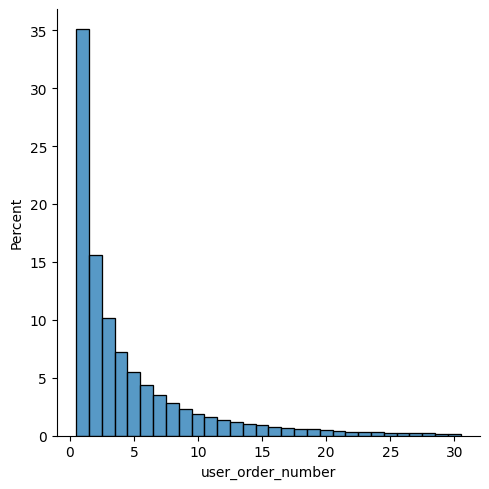

In [ ]:
sns.displot(data = df.loc[df['user_order_number']<=30], x = 'user_order_number',stat = 'percent', discrete = True)
plt.show()

### Daily Cohort

In [ ]:
df['cohort_day'] = df.groupby('user_id')['created_at'].transform('min')
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,total_cost,year,month,day,user_order_count,cohort_day
0,1,1,2021-12-04,10000,1,12000,2000,2021,12,4,1,2021-12-04
1,2,2,2021-09-05,0,0,20000,20000,2021,9,5,1,2021-09-05
2,3,3,2021-09-05,10000,1,14000,4000,2021,9,5,1,2021-09-05
3,4,4,2021-10-11,0,0,15000,15000,2021,10,11,1,2021-10-11
4,5,5,2021-10-11,10000,1,16000,6000,2021,10,11,1,2021-10-11


In [ ]:
df.loc[df['user_id'] == 22]

,order_id,user_id,created_at,discount_cost,discount_type,basket,total_cost,year,month,day,user_order_count,cohort_day,cohort_index
21,22,22,2022-01-01,0,0,25000,25000,2022,1,1,1,2022-01-01,0 days
69,70,22,2022-02-01,0,0,35000,35000,2022,2,1,2,2022-01-01,31 days
2490,2491,22,2022-05-02,0,0,49000,49000,2022,5,2,3,2022-01-01,121 days
25857,25858,22,2022-07-16,0,0,10000,10000,2022,7,16,4,2022-01-01,196 days


In [ ]:
df['cohort_index'] = df['created_at'] - df['cohort_day']
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,total_cost,year,month,day,user_order_count,cohort_day,cohort_index
0,1,1,2021-12-04,10000,1,12000,2000,2021,12,4,1,2021-12-04,0 days
1,2,2,2021-09-05,0,0,20000,20000,2021,9,5,1,2021-09-05,0 days
2,3,3,2021-09-05,10000,1,14000,4000,2021,9,5,1,2021-09-05,0 days
3,4,4,2021-10-11,0,0,15000,15000,2021,10,11,1,2021-10-11,0 days
4,5,5,2021-10-11,10000,1,16000,6000,2021,10,11,1,2021-10-11,0 days


In [ ]:
df['cohort_index'] = df['cohort_index'].dt.days

In [ ]:
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,total_cost,year,month,day,user_order_count,cohort_day,cohort_index
0,1,1,2021-12-04,10000,1,12000,2000,2021,12,4,1,2021-12-04,0
1,2,2,2021-09-05,0,0,20000,20000,2021,9,5,1,2021-09-05,0
2,3,3,2021-09-05,10000,1,14000,4000,2021,9,5,1,2021-09-05,0
3,4,4,2021-10-11,0,0,15000,15000,2021,10,11,1,2021-10-11,0
4,5,5,2021-10-11,10000,1,16000,6000,2021,10,11,1,2021-10-11,0


In [ ]:
grouping = df.groupby(['cohort_day', 'cohort_index'])
cohort_data = grouping['user_id'].apply(pd.Series.nunique)

In [ ]:
cohort_data = cohort_data.reset_index()

In [ ]:
cohort_counts = cohort_data.pivot(index = 'cohort_day', columns = 'cohort_index', values = 'user_id')

In [ ]:
cohort_sizes = cohort_counts.iloc[:,0]
cohort_sizes

cohort_day
2021-09-05     2.0
2021-10-11     2.0
2021-12-04     1.0
2022-01-01    59.0
2022-01-02    72.0
              ... 
2022-12-03    19.0
2022-12-04    27.0
2022-12-05    44.0
2022-12-06    28.0
2022-12-07    33.0
Name: 0, Length: 215, dtype: float64

In [ ]:
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3)*100

cohort_index,0,1,2,3,4,5,6,7,8,9,...,331,332,333,334,335,336,337,338,339,418
cohort_day,,,,,,,,,,,,,,,,,,,,,
2021-09-05,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-11,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
2021-12-04,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01,100.0,5.1,NaN,NaN,1.7,3.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.4,3.4,1.7,1.7,NaN,3.4,NaN
2022-01-02,100.0,5.6,4.2,2.8,4.2,2.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.2,2.8,1.4,2.8,1.4,1.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-03,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-04,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-05,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
type(retention)

pandas.core.frame.DataFrame

In [ ]:
retention_df = retention.loc[:,0:30].iloc[0:30].round(3)*100
retention_df.fillna(0,inplace = True)
retention_df.head()

cohort_index,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
cohort_day,,,,,,,,,,,,,,,,,,,,,
2021-09-05,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-11,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-04,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-01,100.0,5.1,0.0,0.0,1.7,3.4,0.0,0.0,0.0,0.0,...,3.4,3.4,0.0,6.8,5.1,3.4,3.4,3.4,3.4,3.4
2022-01-02,100.0,5.6,4.2,2.8,4.2,2.8,0.0,0.0,0.0,0.0,...,2.8,4.2,6.9,0.0,5.6,4.2,4.2,2.8,2.8,1.4


In [ ]:
retention_df.index.strftime('%m-%d')

Index(['09-05', '10-11', '12-04', '01-01', '01-02', '01-03', '01-04', '01-05',
       '01-06', '01-07', '01-13', '01-14', '01-15', '01-16', '01-17', '01-18',
       '01-19', '01-20', '01-21', '01-22', '01-23', '01-24', '01-25', '01-26',
       '01-27', '01-28', '01-29', '01-30', '01-31', '02-01'],
      dtype='object', name='cohort_day')

In [ ]:
retention_df.index = retention_df.index.strftime('%m-%d')

NameError: ignored

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(retention_df, annot = True, vmin = 0.0, vmax = 20, cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation = 360)
plt.show()

NameError: ignored

<Figure size 1600x1000 with 0 Axes>

### Monthly Cohort

In [ ]:
df['cohort_month'] = df.groupby('user_id')['created_at'].transform('min').apply(lambda x: dt.datetime(x.year,x.month,1))
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,total_cost,year,month,day,user_order_number,cohort_month
5,6,6,2022-01-01,0,0,10000,10000,2022,1,1,1,2022-01-01
6,7,7,2022-01-01,0,0,29500,29500,2022,1,1,1,2022-01-01
7,8,8,2022-01-01,10000,1,10000,20000,2022,1,1,1,2022-01-01
8,9,9,2022-01-01,0,0,5000,5000,2022,1,1,1,2022-01-01
9,10,10,2022-01-01,0,0,35000,35000,2022,1,1,1,2022-01-01


In [ ]:
df['cohort_index'] = df['created_at'].dt.to_period('M').view(dtype='int64') - df['cohort_month'].dt.to_period('M').view(dtype='int64')
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,total_cost,year,month,day,user_order_number,cohort_month,cohort_index
5,6,6,2022-01-01,0,0,10000,10000,2022,1,1,1,2022-01-01,0
6,7,7,2022-01-01,0,0,29500,29500,2022,1,1,1,2022-01-01,0
7,8,8,2022-01-01,10000,1,10000,20000,2022,1,1,1,2022-01-01,0
8,9,9,2022-01-01,0,0,5000,5000,2022,1,1,1,2022-01-01,0
9,10,10,2022-01-01,0,0,35000,35000,2022,1,1,1,2022-01-01,0


In [ ]:
df.tail()

,order_id,user_id,created_at,discount_cost,discount_type,basket,total_cost,year,month,day,user_order_number,cohort_month,cohort_index
29052,29053,6622,2022-07-31,0,0,18000,18000,2022,7,31,3,2022-05-01,2
29053,29054,9985,2022-07-31,0,0,25000,25000,2022,7,31,1,2022-07-01,0
29054,29055,8843,2022-07-31,6000,1,24000,30000,2022,7,31,3,2022-07-01,0
29055,29056,8703,2022-07-31,0,0,40000,40000,2022,7,31,4,2022-07-01,0
29056,29057,4424,2022-07-31,0,0,17000,17000,2022,7,31,3,2022-04-01,3


In [ ]:
df.dtypes

order_id                      int64
user_id                       int64
created_at           datetime64[ns]
discount_cost                 int64
discount_type                 int32
basket                        int64
total_cost                    int64
year                          int64
month                         int64
day                           int64
user_order_number             int64
cohort_month         datetime64[ns]
cohort_index                  int64
dtype: object

In [ ]:
groupings = df.groupby(['cohort_month','cohort_index'])
cohort_data = groupings['user_id'].nunique()
cohort_data

cohort_month  cohort_index
2022-01-01    0               1492
              1                457
              2                365
              3                378
              4                316
              5                317
              6                324
2022-02-01    0               1539
              1                385
              2                393
              3                362
              4                354
              5                337
2022-03-01    0               1258
              1                306
              2                275
              3                259
              4                277
2022-04-01    0               1592
              1                421
              2                389
              3                391
2022-05-01    0               1192
              1                352
              2                287
2022-06-01    0               1397
              1                405
2022-07-01    0             

In [ ]:
cohort_data = cohort_data.to_frame().reset_index()
cohort_data['cohort_month'] = cohort_data['cohort_month'].dt.strftime('%y-%m')
cohort_data.head()

,cohort_month,cohort_index,user_id
0,22-01,0,1492
1,22-01,1,457
2,22-01,2,365
3,22-01,3,378
4,22-01,4,316


In [ ]:
# cohort_counts = cohort_data.pivot(columns = 'cohort_index', index = 'cohort_month', values = 'user_id')
cohort_counts = cohort_data.pivot_table(columns = 'cohort_index', index = 'cohort_month', values = 'user_id',aggfunc=np.sum,margins = True).iloc[:,:-1]
cohort_size = cohort_counts.iloc[:,0]

In [ ]:
retention = cohort_counts.divide(cohort_size, axis = 0)
retention = retention.round(3)*100
retention.iloc[-1,1:] = retention.iloc[:-1,1:].mean().round(1)
retention

cohort_index,0,1,2,3,4,5,6
cohort_month,,,,,,,
22-01,100.0,30.6,24.5,25.3,21.2,21.2,21.7
22-02,100.0,25.0,25.5,23.5,23.0,21.9,NaN
22-03,100.0,24.3,21.9,20.6,22.0,NaN,NaN
22-04,100.0,26.4,24.4,24.6,NaN,NaN,NaN
22-05,100.0,29.5,24.1,NaN,NaN,NaN,NaN
22-06,100.0,29.0,NaN,NaN,NaN,NaN,NaN
22-07,100.0,NaN,NaN,NaN,NaN,NaN,NaN
All,100.0,27.5,24.1,23.5,22.1,21.5,21.7


In [ ]:
# nom = cohort_counts.iloc[:,:].reset_index().iloc[-1,1:].reset_index(drop = True)
# den = cohort_counts.iloc[:,:].reset_index().iloc[:-1,1].cumsum()[::-1].reset_index(drop = True)
# retention.iloc[-1,:] = (nom.astype(float)/den.astype(float)).round(3)*100

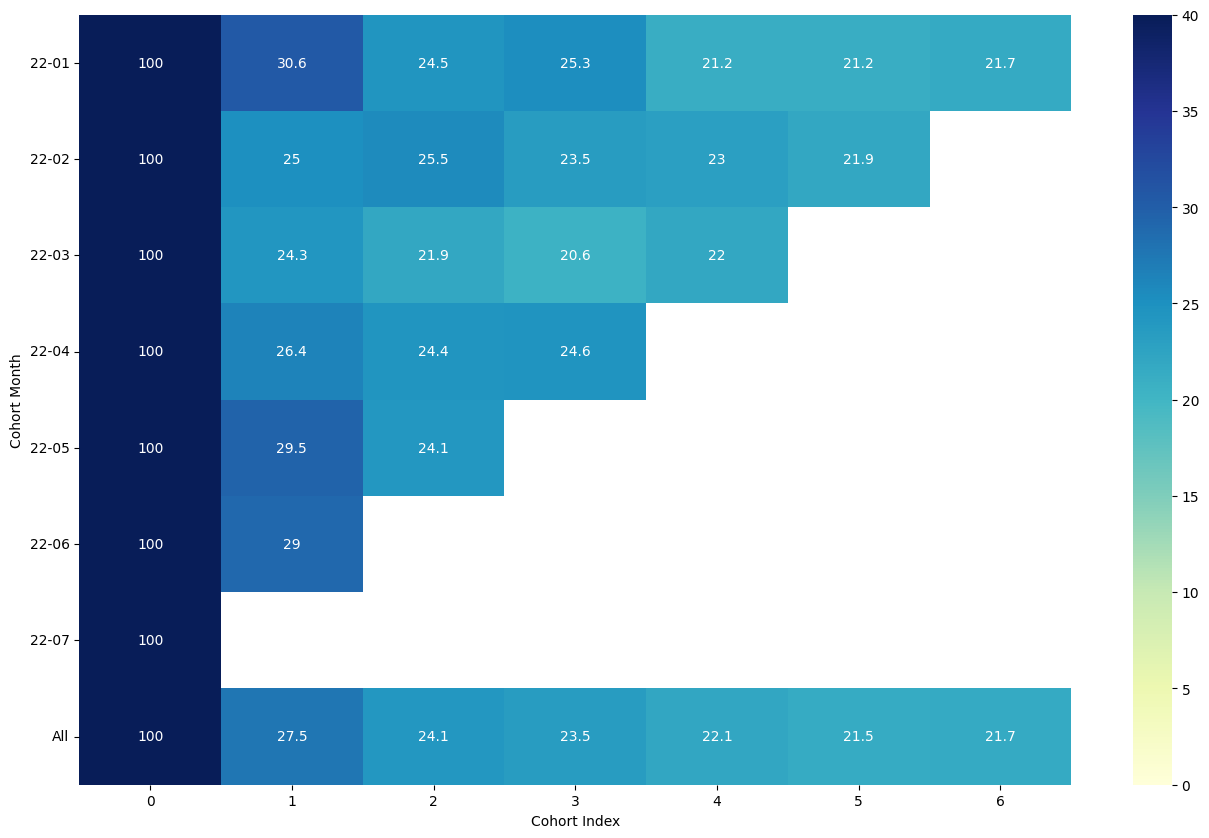

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(retention, annot = True, vmin = 0.0, vmax = 40, cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation = 360)
plt.show()

After Visualizing Monthly Cohort with heatmap The The following results are obtained:


1.   **Out of all users 27.5% of the users are retained on month 1 and retention Retention has always been above 20%, which means 1 in 5 users still using the app which is realy good.**
2.   **about 75% of users stop using the app after 1 month. it means users are not onboarded or do not like app in some ways.**



In [ ]:
data = cohort_counts.iloc[:-2,1]
data = data.reset_index()
data

,cohort_month,1
0,22-01,457.0
1,22-02,385.0
2,22-03,306.0
3,22-04,421.0
4,22-05,352.0
5,22-06,405.0


<Axes: >

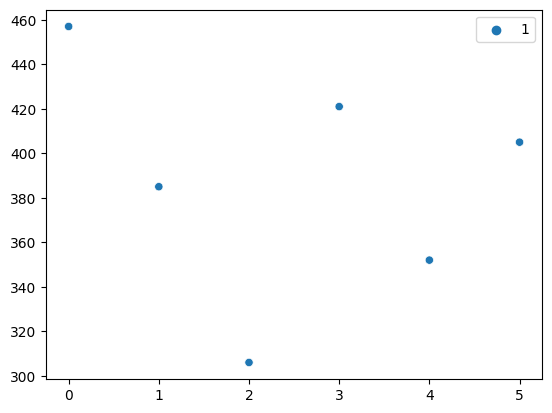

In [ ]:
sns.scatterplot(data = data)

By using polynomial regression of First month we can predict the number of orders in July 2022

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

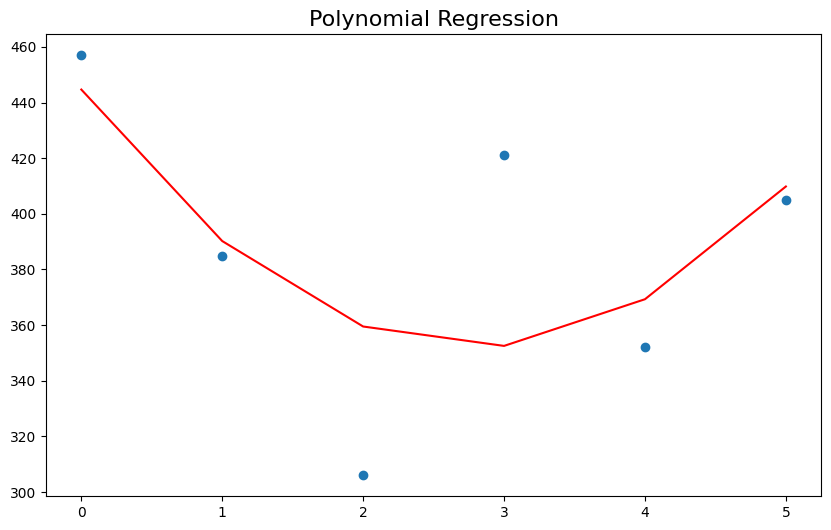

In [ ]:
x = np.array(data.index)
y = np.array(data[1])
poly = PolynomialFeatures(degree = 2, include_bias=False)

poly_features = poly.fit_transform(x.reshape(-1,1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)# depicting the polynomial graph
plt.figure(figsize=(10, 6))
plt.title("Polynomial Regression", size=16)
plt.scatter(x,y)
plt.plot(x, y_predicted, c="red")
plt.show()

In [ ]:
i = 6
i_2 = 6**2
y_pred = poly_reg_model.predict([[i,i_2]])
y_pred

array([474.1])

In [ ]:
y_predicted = np.insert(y_predicted,len(y_predicted),y_pred[0])
x = np.insert(x,len(x),len(data))

In [ ]:
y_predicted

array([444.67857143, 390.20714286, 359.48571429, 352.51428571,
       369.29285714, 409.82142857, 474.1       ])

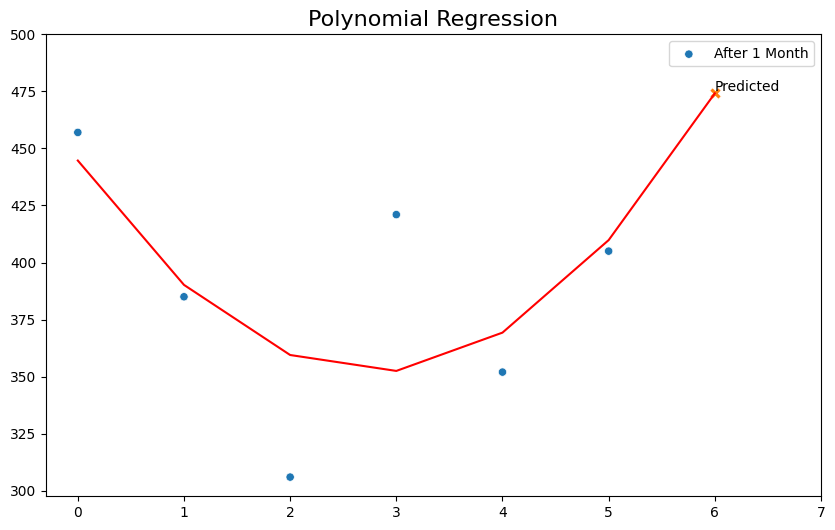

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Polynomial Regression", size=16)
sns.scatterplot(data = data)
sns.scatterplot(x = len(data), y = y_pred, s = 70, style = y_pred, markers = 'X',
                legend = False)
plt.text(len(data), y_pred+1,'Predicted')
plt.plot(x, y_predicted, c="red")
plt.xlim(right = 7)
plt.ylim(top = 500)
plt.legend(['After 1 Month'])
plt.show()

In [ ]:
(y_pred[0]/cohort_size[-2]).round(3)*100

31.3

The Prediction for July 2022

**474 users , 31.3 percent of users who had transaction in june 2022 has been predicted to have transaction in july.**

### Discount Cohort

In [ ]:
First_discount = df.groupby('user_id')['discount_type'].first()
First_discount_df = pd.merge(df,First_discount,how='inner',on='user_id')
First_discount_df.rename(columns = {'discount_type_y':'Cohort_discount','discount_type_x':'discount_type'},inplace=True)
First_discount_df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,total_cost,year,month,day,user_order_number,cohort_month,cohort_index,Cohort_discount
0,6,6,2022-01-01,0,0,10000,10000,2022,1,1,1,2022-01-01,0,0
1,213,6,2022-01-05,0,0,41800,41800,2022,1,5,2,2022-01-01,0,0
2,535,6,2022-01-11,0,0,10000,10000,2022,1,11,3,2022-01-01,0,0
3,740,6,2022-01-14,0,0,7000,7000,2022,1,14,4,2022-01-01,0,0
4,4875,6,2022-02-28,0,0,7125,7125,2022,2,28,5,2022-01-01,1,0


In [ ]:
df = First_discount_df

In [ ]:
df.loc[df.user_id==976]

,order_id,user_id,created_at,discount_cost,discount_type,basket,total_cost,year,month,day,user_order_number,cohort_month,cohort_index,Cohort_discount
4303,1181,976,2022-01-20,0,0,68000,68000,2022,1,20,1,2022-01-01,0,0
4304,4610,976,2022-02-25,0,0,35000,35000,2022,2,25,2,2022-01-01,1,0
4305,5968,976,2022-03-10,0,0,41000,41000,2022,3,10,3,2022-01-01,2,0
4306,7002,976,2022-03-20,0,0,35000,35000,2022,3,20,4,2022-01-01,2,0
4307,8348,976,2022-04-04,0,0,45000,45000,2022,4,4,5,2022-01-01,3,0
4308,10425,976,2022-04-17,0,0,72000,72000,2022,4,17,6,2022-01-01,3,0
4309,13245,976,2022-05-04,0,0,45000,45000,2022,5,4,7,2022-01-01,4,0
4310,16611,976,2022-05-27,0,0,45000,45000,2022,5,27,8,2022-01-01,4,0
4311,18675,976,2022-06-09,0,0,40000,40000,2022,6,9,9,2022-01-01,5,0
4312,21854,976,2022-06-26,0,0,40000,40000,2022,6,26,10,2022-01-01,5,0


In [ ]:
groupings = df.groupby(['Cohort_discount','cohort_month','cohort_index'])
cohort_data = groupings['user_id'].nunique()
cohort_data

Cohort_discount  cohort_month  cohort_index
0                2022-01-01    0               784
                               1               300
                               2               239
                               3               253
                               4               223
                                              ... 
2                2022-04-01    0                22
                               1                 5
                               2                 5
                               3                 8
                 2022-07-01    0                12
Name: user_id, Length: 68, dtype: int64

In [ ]:
cohort_data = cohort_data.reset_index()
cohort_data['cohort_month'] = cohort_data['cohort_month'].dt.strftime('%y-%m')
cohort_data.head()

,Cohort_discount,cohort_month,cohort_index,user_id
0,0,22-01,0,784
1,0,22-01,1,300
2,0,22-01,2,239
3,0,22-01,3,253
4,0,22-01,4,223


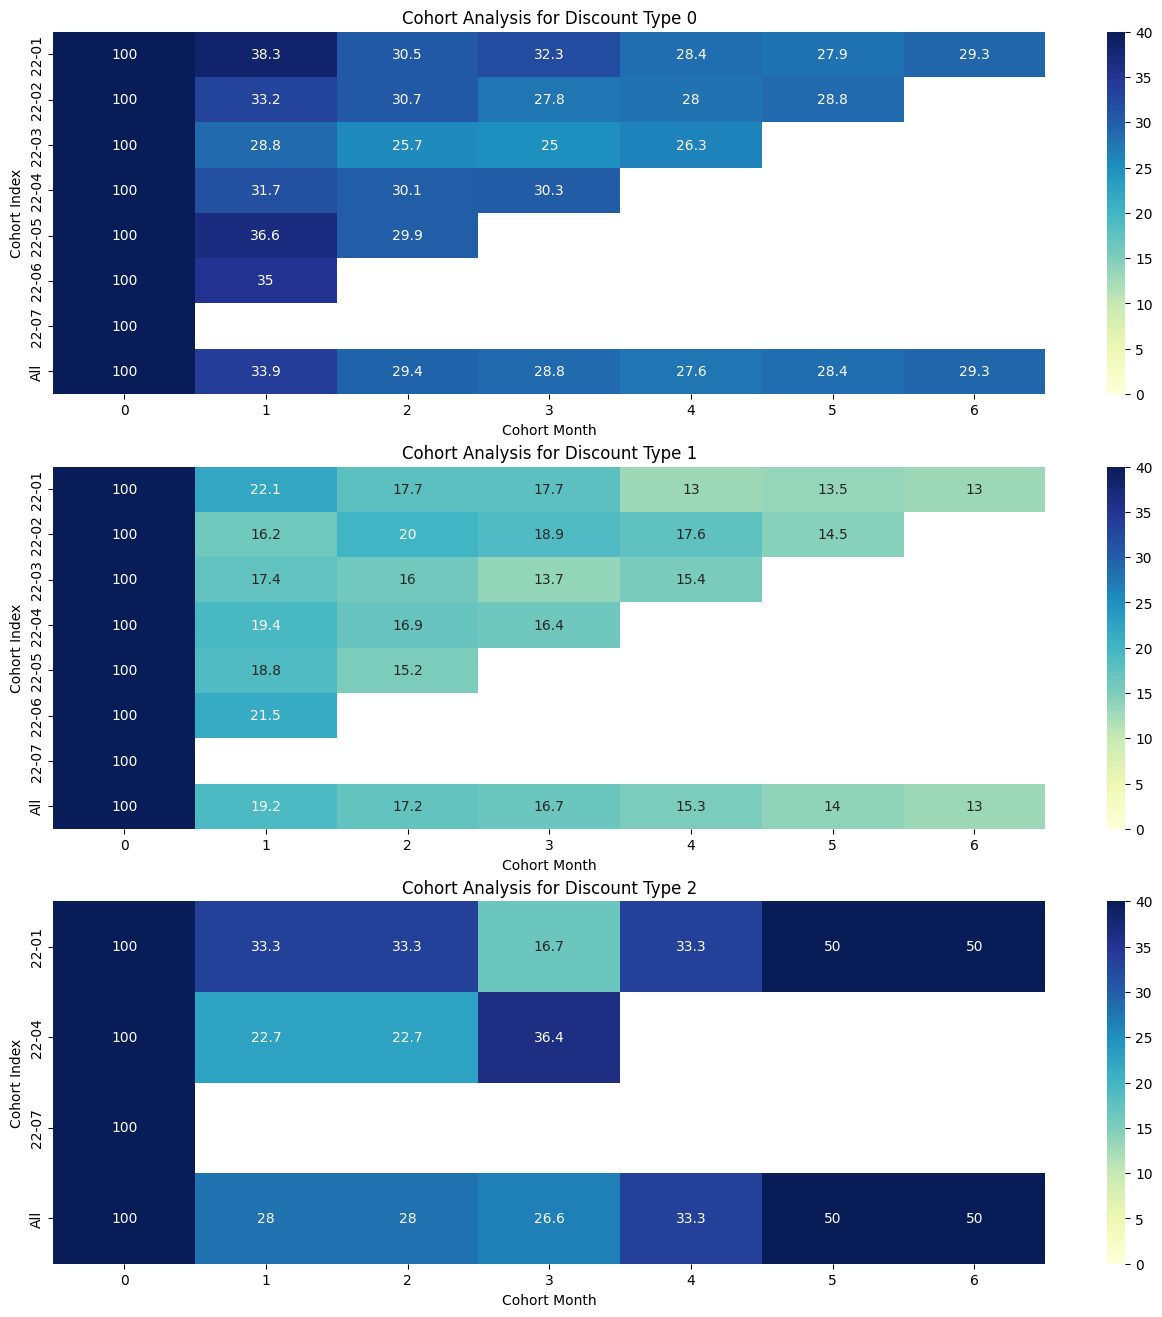

In [ ]:
dis = cohort_data['Cohort_discount'].unique()
fig, ax = plt.subplots(dis.shape[0],1,figsize=(16,16))
for i,n in enumerate(dis):
  cohort_first = cohort_data.loc[cohort_data['Cohort_discount']==n]
  # cohort_counts = cohort_first.pivot(columns = 'cohort_index', index = 'cohort_month', values = 'user_id')

  cohort_counts = cohort_first.pivot_table(columns = 'cohort_index',
                                          index = 'cohort_month',
                                          values = 'user_id',
                                          aggfunc=np.sum,
                                          margins = True).iloc[:,:-1]

  cohort_size = cohort_counts.iloc[:,0]
  retention = cohort_counts.divide(cohort_size, axis = 0).round(3)*100
  retention.iloc[-1,1:] = retention.iloc[:-1,1:].mean().round(1)

  sns.heatmap(retention, annot = True, vmin = 0.0, vmax = 40, cmap="YlGnBu", fmt='g',ax = ax[i])
  ax[i].set_xlabel('Cohort Month')
  ax[i].set_ylabel('Cohort Index')
  ax[i].title.set_text('Cohort Analysis for Discount Type {}'.format(n))
plt.show()

In [ ]:
cohort_data.loc[cohort_data['Cohort_discount']==2].shape

(12, 4)

**There is only 12 orders with type_2 discount so we can ignore them**

Orders with discount type 0 (no discount) has better performance over time

1.   33 percent out of all users (1 in 3) with this type discount are retained in month 1.
2.   the retention over user life time never gets below 25 percent in type 0 discount.

Users with Type 1 discount have poor performance over time.

1. Only 20 percent of all users (1 in 5) with this type discount are retained in month 1.

2. After 4 month retention drops off below 15 percent.

***Question: Why type 1 discount is weaker than type 0 discount(no discount) ?***

**Hypothesis: Users are used to using discounts. That is, they buy only when they have a discount.**

***Hypothesis Testing***

We need to see through users with Cohort_discount = 1 (users who use discount for their first order) and see how many of them only use discount.

In [ ]:
cohort_discount_0 = df.loc[df['Cohort_discount']==0]
cohort_discount_0.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,total_cost,year,month,day,user_order_number,cohort_month,cohort_index,Cohort_discount
0,6,6,2022-01-01,0,0,10000,10000,2022,1,1,1,2022-01-01,0,0
1,213,6,2022-01-05,0,0,41800,41800,2022,1,5,2,2022-01-01,0,0
2,535,6,2022-01-11,0,0,10000,10000,2022,1,11,3,2022-01-01,0,0
3,740,6,2022-01-14,0,0,7000,7000,2022,1,14,4,2022-01-01,0,0
4,4875,6,2022-02-28,0,0,7125,7125,2022,2,28,5,2022-01-01,1,0


In [ ]:
cohort_discount_0['discount_type'].value_counts()

0    18618
1      822
2       71
Name: discount_type, dtype: int64

Distribiution of users who didn't use discount in their first order (Cohort_discount = 0)

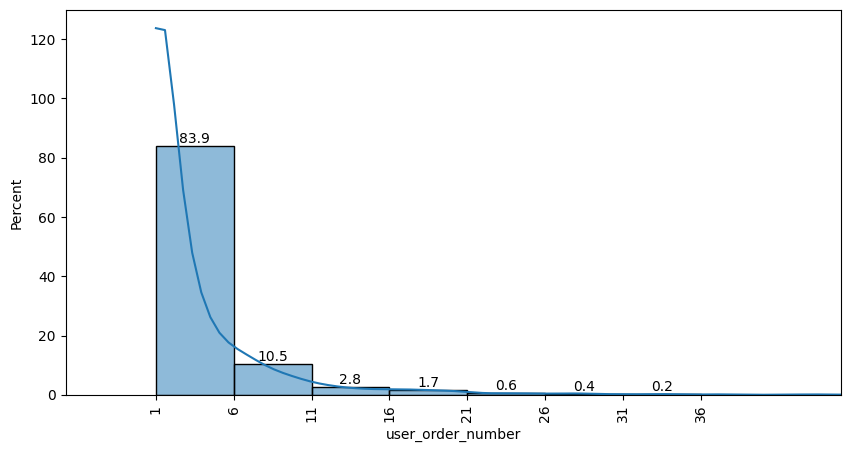

In [ ]:
dist_0 = cohort_discount_0.groupby('user_id')['user_order_number'].max()
fig, ax = plt.subplots(figsize = (10,5))
p = sns.histplot(dist_0, stat = 'percent', bins = range(1,40,5),kde = True)
for container in p.containers:
    p.bar_label(container, fmt='%.1f')
plt.xticks(range(1,40,5),rotation = 90)
plt.xlim(right = 45)
plt.show()

In [ ]:
cohort_discount_1 = df.loc[df['Cohort_discount']== 1]
cohort_discount_1.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,total_cost,year,month,day,user_order_number,cohort_month,cohort_index,Cohort_discount
15,8,8,2022-01-01,10000,1,10000,20000,2022,1,1,1,2022-01-01,0,1
16,15217,8,2022-05-17,0,0,36000,36000,2022,5,17,2,2022-01-01,4,1
17,25137,8,2022-07-13,0,0,21000,21000,2022,7,13,3,2022-01-01,6,1
46,11,11,2022-01-01,15000,1,21000,36000,2022,1,1,1,2022-01-01,0,1
47,1031,11,2022-01-19,0,0,22000,22000,2022,1,19,2,2022-01-01,0,1


In [ ]:
cohort_discount_1['discount_type'].value_counts()

1    5954
0    3440
2      26
Name: discount_type, dtype: int64

Distribiution of users who use discount in their first order

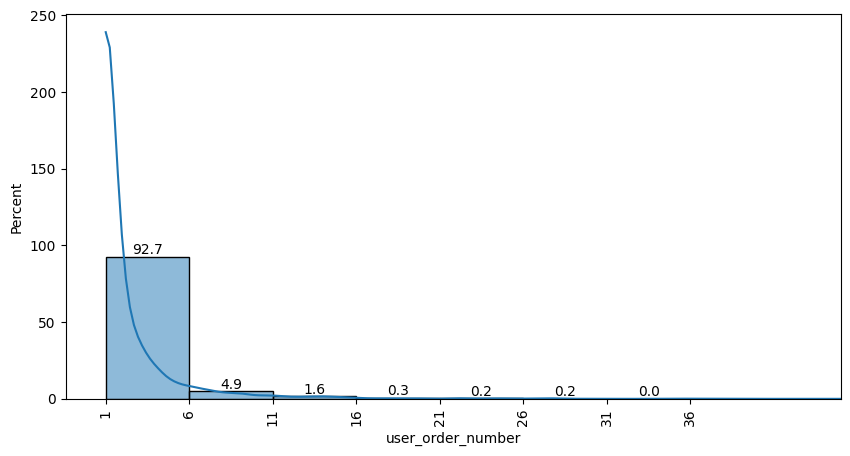

In [ ]:
dist_1 = cohort_discount_1.groupby('user_id')['user_order_number'].max()
fig, ax = plt.subplots(figsize = (10,5))
p = sns.histplot(dist_1, stat = 'percent', bins = range(1,40,5),kde = True)
for container in p.containers:
    p.bar_label(container, fmt='%.1f')
plt.xticks(range(1,40,5),rotation = 90)
plt.xlim(right = 45)
plt.show()

In [ ]:
segment = cohort_discount_1.groupby(['discount_type'])['user_id'].unique()
discount_only = cohort_discount_1.loc[~cohort_discount_1['user_id'].isin(segment[0])]['user_id'].nunique()
# .groupby(['user_id','discount_type'])['order_id'].count().to_frame()
all_disc_1 = cohort_discount_1['user_id'].nunique()
percent = discount_only/all_disc_1
round(percent,2)*100

77.0

**77 percent of the users which use discount in their first order didn't purchase again without discount!**

In [ ]:
segment

discount_type
0    [8, 11, 14, 25, 52, 53, 63, 66, 72, 91, 93, 95...
1    [8, 11, 12, 14, 15, 24, 25, 26, 30, 31, 32, 34...
2    [369, 1290, 1507, 1621, 1629, 1701, 1862, 2249...
Name: user_id, dtype: object

lets divide this data into two segment:

segment_1: users who only use discount.(Type 1 and Type 2)

segment_0: users who purchased with and without discount.

In [ ]:
segment_1 = cohort_discount_1.loc[~cohort_discount_1['user_id'].isin(segment[0])]['order_id'].count()
segment_0 = cohort_discount_1.loc[cohort_discount_1['user_id'].isin(segment[0])]['order_id'].count()

In [ ]:
def seg(x):
  if ((x in segment[0])&(x in segment[1]))|((x in segment[0])&(x in segment[2])):
    return "segment_0"
  else:
    return "segment_1"
cohort_discount_1['segment'] = cohort_discount_1['user_id'].apply(lambda x: seg(x))

<ipython-input-57-8a92cff4b640>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_discount_1['segment'] = cohort_discount_1['user_id'].apply(lambda x: seg(x))


In [ ]:
cohort_discount_1

,order_id,user_id,created_at,discount_cost,discount_type,basket,total_cost,year,month,day,user_order_number,cohort_month,cohort_index,Cohort_discount,segment
15,8,8,2022-01-01,10000,1,10000,20000,2022,1,1,1,2022-01-01,0,1,segment_0
16,15217,8,2022-05-17,0,0,36000,36000,2022,5,17,2,2022-01-01,4,1,segment_0
17,25137,8,2022-07-13,0,0,21000,21000,2022,7,13,3,2022-01-01,6,1,segment_0
46,11,11,2022-01-01,15000,1,21000,36000,2022,1,1,1,2022-01-01,0,1,segment_0
47,1031,11,2022-01-19,0,0,22000,22000,2022,1,19,2,2022-01-01,0,1,segment_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29036,28969,9970,2022-07-31,15000,1,20000,35000,2022,7,31,1,2022-07-01,0,1,segment_1
29037,28971,9971,2022-07-31,15000,1,15000,30000,2022,7,31,1,2022-07-01,0,1,segment_1
29040,28986,9974,2022-07-31,10000,1,20000,30000,2022,7,31,1,2022-07-01,0,1,segment_1
29044,29023,9978,2022-07-31,10000,1,24000,34000,2022,7,31,1,2022-07-01,0,1,segment_1


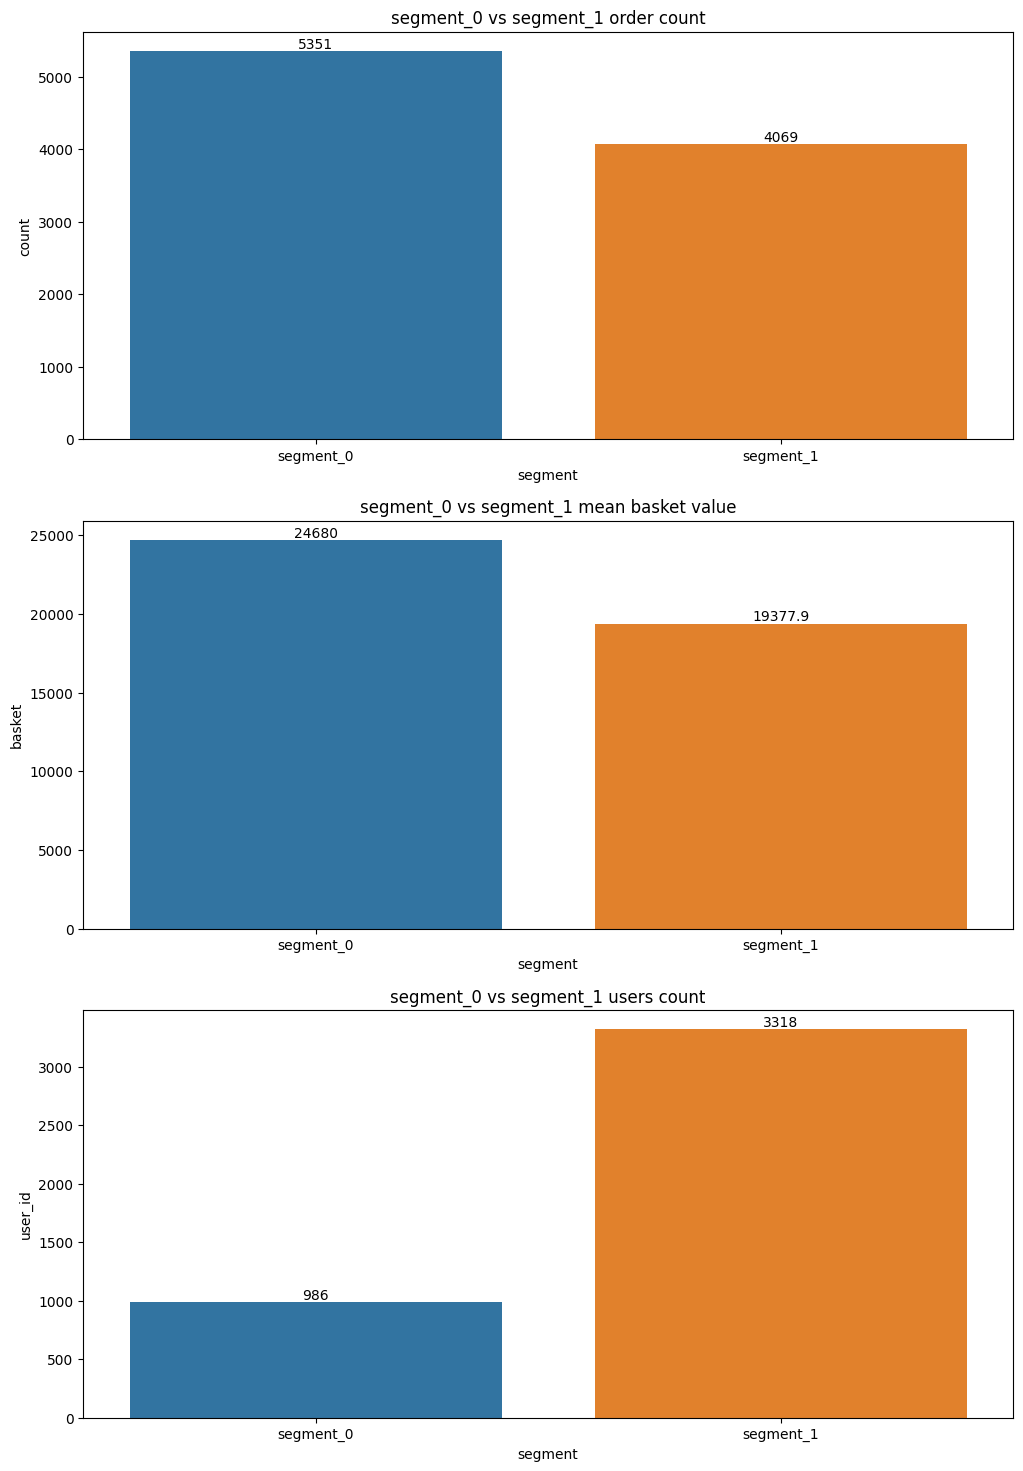

In [ ]:
fix, ax = plt.subplots(3,1,figsize = (12,18))
p1 = sns.countplot(data = cohort_discount_1,x = 'segment', ax=ax[0])
for container in p1.containers:
    p1.bar_label(container)
ax[0].set_title('segment_0 vs segment_1 order count')

gr = cohort_discount_1.groupby('segment')
p2 = sns.barplot(x = gr['basket'].mean().index, y = gr['basket'].mean(),
                 ax = ax[1])
for container in p2.containers:
    p2.bar_label(container)
ax[1].set_title('segment_0 vs segment_1 mean basket value')

p3 = sns.barplot(x = gr['user_id'].nunique().index, y = gr['user_id'].nunique(),
                 ax = ax[2])
for container in p3.containers:
    p3.bar_label(container)
ax[2].set_title('segment_0 vs segment_1 users count')
plt.show()

**Although the number of users of segment 0 is less than the users of segment 1, the number of their orders and the value of their purchases are significantly higher. it can be concluded that users of segment 1 are do not have a good quality.**